### Question 2 Part B

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import random
import math


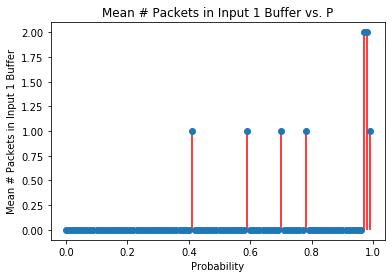

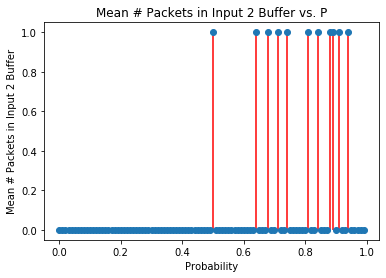

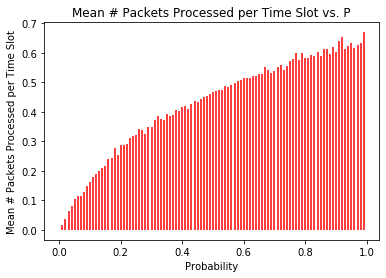

Estimated 95% Confidence Interval for Efficiency: (0.02, 0.484)


In [2]:
r_ij = 0.75
p = np.arange(0, 1.00, 0.01)  #probability that packet arrives at port 1 
num_slots = 1000 #assigning system to have 1000 slots
ip1_mean = np.empty(100)
ip2_mean = np.empty(100)
mean_packets = np.empty(100)
eff_p = np.empty(100)

for i in range(0, len(p)): #for the 100 different probabilities
    time_slot = 0
    packets = 0
    in1_buf = 0
    in2_buf = 0
    
    for j in range(0,1000): #for the 1000 slots in the system
        in1 = np.random.rand()
        in2 = np.random.rand()
        
        if(in1_buf != 0 & in2_buf == 0):
            
            out1 = np.random.rand()
            if(out1 < r_ij):
                out1 = 1 #output of input 1 to port 1
            else:
                out1 = 2 #output of input 1 to port 2
            if(in2 < p[i]): #checks if there is a packet at input 2
                out2 = np.random.rand()
                if(in2 < r_ij):
                    out2 = 1
                else:
                    out2 = 2
            else:
                out2 = 0
            

        elif(in1_buf == 0 & in2_buf != 0 ):
            out2 = np.random.rand() 
            if(out2 < r_ij):
                out2 = 1 #output of input 2 to port 1
            else:
                out2 = 2 #output of input 2 to port 2
            if(in1 < p[i]):
                out1 = np.random.rand()
                if(out1 < r_ij):
                    out1 = 1 #output of input 1 to port 1
                else:
                    out1 = 2 #output of input 1 to port 2
            else:
                out1 = 0 
        elif(in1_buf != 0 & in2_buf != 0): #both buffers have something to send
            out1 = np.random.rand()
            out2 = np.random.rand()
            
            if(out1 < r_ij):
                out1 = 1
            else:
                out1 = 2
            if(out2< r_ij):
                out2  = 1
            else:
                out2 = 2
            
            time_slot += 1
            packets += 2
            
            if(in1_buf !=0):
                in1_buf -= 1
            if(in2_buf != 0):
                in2_buf -= 1
        elif(in1_buf ==0 & in2_buf == 0): #both buffers empty
            
            if (in1 < p[i]):
                out1 = np.random.rand()
                if(out1 < r_ij):
                    out1 = 1
                else:
                    out1 = 2
            else:
                out1 = 0
            
            if(in2 < p[i]):
                out2 = np.random.rand()
                if(out2 < r_ij):
                    out2 = 1
                else:
                    out2 = 2
            else:
                out2 = 0
            
            time_slot += 1
            if(in1_buf != 0):
                in1_buf -= 1
            if(in2_buf != 0):
                in2_buf -= 1
        
        if(out1 != out2):
            time_slot += 1
            packets += 1
            if(in1_buf != 0):
                in1_buf -= 1
            if(in2_buf != 0):
                in2_buf -= 1
        if(out1 == out2 & out1 != 0):
            time_slot += 1
            packets += 1
            
            dest = np.random.rand()
            if(dest < 0.5): # if output contested the buffer chosen with 50/50 probability
                in1_buf += 1
                if(in2_buf != 0):
                    in2_buf -= 1
            else:
                in2_buf  += 1
                if(in1_buf != 0):
                    in1_buf -= 1
    ip1_mean[i] = in1_buf
    ip2_mean[i] = in2_buf
    mean_packets[i] = packets/time_slot
    eff_p[i] = packets/(2*1000)

plt.figure(1)
plt.stem(p, ip1_mean, 'r', use_line_collection = True, basefmt=" ")
plt.title('Mean # Packets in Input 1 Buffer vs. P')
plt.ylabel('Mean # Packets in Input 1 Buffer')
plt.xlabel('Probability')
plt.show()

plt.figure(2)
plt.stem(p, ip2_mean, 'r', use_line_collection = True, basefmt=" ")
plt.title('Mean # Packets in Input 2 Buffer vs. P', )
plt.ylabel('Mean # Packets in Input 2 Buffer')
plt.xlabel('Probability')
plt.show()

plt.figure(3)
plt.stem(p, mean_packets, 'r', use_line_collection = True, markerfmt=' ', basefmt=" ")
plt.title('Mean # Packets Processed per Time Slot vs. P')
plt.ylabel('Mean # Packets Processed per Time Slot')
plt.xlabel('Probability')
plt.show()

print('Estimated 95% Confidence Interval for Efficiency: ('+str(eff_p[2])+', ' \
      +str(eff_p[77])+')')


#### Q2 Part B Analysis

- Now the probability of a packet switching from i to j is 0.75, and 0.25 for j to i so it is no longer symmetrical.
- The first graph is a stem plot of the mean number of packets in the input buffer vs. the probability that a packet arrives at port 1. 
    - In this case, as the probability increases, the number of packets as processed at port 1 increases because it is more likely that there are more packets there.
- The second graph is a stem plot of the mean number of packets in the input buffer at port 2 vs. the probability that a packet arrives at port 1. 
    - In this case, an increasing p results in more packets in the buffer at port 2. 
- The third graph is a stem plot of the mean number of packets processed per time slot vs the probability of a packet showing up at port 1. It is evident that as the probability of a packet showing up at the port increases, so does the mean number of packets processed.